# TASK-8: HEART ATTACK PREDICTION

In [1]:
#inpoting the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report 

In [2]:
data=pd.read_csv('HeartPred.csv')

In [3]:
data.shape

(294, 14)

In [29]:
data.describe

<bound method NDFrame.describe of           age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0   -2.524482 -0.150386 -1.794987  1.933389 -0.652282       0      0      1   
1   -2.396889 -0.715960 -0.096999  0.878681 -0.652282       0      0      1   
3   -2.269296  2.111910 -0.188782  1.300564 -0.652282       0      1      0   
4   -2.141704 -1.847108 -0.464132  0.456798 -0.652282       0      1      0   
5   -2.014111 -1.564321 -0.785373  1.089622 -0.652282       0      1      0   
..        ...       ...       ...       ...       ...     ...    ...    ...   
289  0.537748  1.546336  1.249153 -1.905748  2.044892       1      0      1   
290  0.792934 -0.150386  0.683157 -1.652618 -0.652282       1      1      0   
291  1.048120  1.263549  1.417422  0.456798  2.584327       1      0      1   
292  1.303306  2.677483  2.197578 -1.230735  0.426588       1      1      0   
293  2.196456 -0.150386  0.392510 -1.019793  0.426588       1      0      1   

     cp_1  cp_2  

In [30]:
data.tail()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,restecg_?,exang_0,exang_1
289,0.537748,1.546336,1.249153,-1.905748,2.044892,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1
290,0.792934,-0.150386,0.683157,-1.652618,-0.652282,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1
291,1.048120,1.263549,1.417422,0.456798,2.584327,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1
292,1.303306,2.677483,2.197578,-1.230735,0.426588,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1
293,2.196456,-0.150386,0.392510,-1.019793,0.426588,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1


In [31]:
data.info

<bound method DataFrame.info of           age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0   -2.524482 -0.150386 -1.794987  1.933389 -0.652282       0      0      1   
1   -2.396889 -0.715960 -0.096999  0.878681 -0.652282       0      0      1   
3   -2.269296  2.111910 -0.188782  1.300564 -0.652282       0      1      0   
4   -2.141704 -1.847108 -0.464132  0.456798 -0.652282       0      1      0   
5   -2.014111 -1.564321 -0.785373  1.089622 -0.652282       0      1      0   
..        ...       ...       ...       ...       ...     ...    ...    ...   
289  0.537748  1.546336  1.249153 -1.905748  2.044892       1      0      1   
290  0.792934 -0.150386  0.683157 -1.652618 -0.652282       1      1      0   
291  1.048120  1.263549  1.417422  0.456798  2.584327       1      0      1   
292  1.303306  2.677483  2.197578 -1.230735  0.426588       1      1      0   
293  2.196456 -0.150386  0.392510 -1.019793  0.426588       1      0      1   

     cp_1  cp_2  cp

# Visualization Of Data

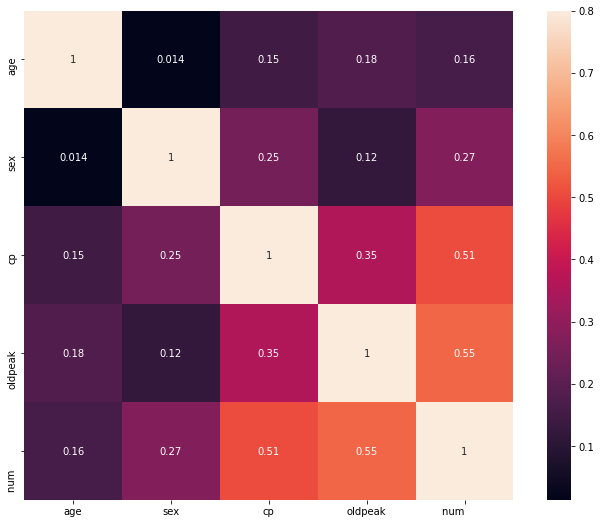

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [5]:
for col in data.columns:
    if 'num' in col:
        continue
    print(col, '\n------------\n') 
    print("Unknown % = {}".format(len(data[data[col] == '?'])/ len(data)))
    print("Median: {}".format(data[data[col] != '?'][col].median()))
    print("Mean: {}".format(data[data[col] != '?'][col].mean()))
temp = data.drop(['ca', 'thal', 'slope'], axis=1)
temp.head()

age 
------------

Unknown % = 0.0
Median: 49.0
Mean: 47.826530612244895
sex 
------------

Unknown % = 0.0
Median: 1.0
Mean: 0.7244897959183674
cp 
------------

Unknown % = 0.0
Median: 3.0
Mean: 2.9829931972789114
trestbps 
------------

Unknown % = 0.003401360544217687
Median: 130.0
Mean: inf
chol 
------------

Unknown % = 0.0782312925170068
Median: 243.0
Mean: inf
fbs 
------------

Unknown % = 0.027210884353741496
Median: 0.0
Mean: 3.496503496503496e+246
restecg 
------------

Unknown % = 0.003401360544217687
Median: 0.0
Mean: 6.829692833109283e+289
thalach 
------------

Unknown % = 0.003401360544217687
Median: 140.0
Mean: inf
exang 
------------

Unknown % = 0.003401360544217687
Median: 0.0
Mean: 3.4129692832764505e+257
oldpeak 
------------

Unknown % = 0.0
Median: 0.0
Mean: 0.5860544217687075
slope 
------------

Unknown % = 0.6462585034013606
Median: 2.0
Mean: 2.0405973184828e+101
ca 
------------

Unknown % = 0.9897959183673469
Median: 0.0
Mean: 0.0
thal 
------------

Unkn

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,?,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [6]:
for col in temp.columns:
    print(col, '\n----------------\n',temp[temp[col] == '?'], '\n-----------------------\n')
# print(temp[temp != '?'])

age 
----------------
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, num       ]
Index: [] 
-----------------------

sex 
----------------
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, num       ]
Index: [] 
-----------------------

cp 
----------------
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, num       ]
Index: [] 
-----------------------

trestbps 
----------------
     age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak  num       
90   48    0   2        ?  308   0       1       ?     ?      2.0           0 
-----------------------

chol 
----------------
      age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak  num       
2     29    1   2      140    ?   0       0     170     0      0.0           0
31    39    1   2      120    ?   0       1     146     0      2.0           0
34    39    1   2      130    ? 

In [7]:
data.rename(columns={'num       ': 'target'}, inplace=True) 
data.drop(['ca', 'thal', 'slope'], axis=1, inplace=True)
#Deleting outliers for now
data.drop(index=[2, 31, 34, 44, 65, 72, 75, 86, 91, 97, 101, 102, 108, 124, 134, 154, 168, 182, 226, 239, 244, 275, 278, 27, 81, 107, 131, 144, 166, 197, 199, 260, 90] , inplace=True)

# for col in data.columns:
#     data.drop(index=data[data[col] == '?'], inplace=True)
# data['chol']=data['chol'].replace('?', data[data['chol'] != '?']['chol'].median())
# data=data.replace('?',None)
# data=data.replace('?',0)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0


In [8]:
#Getting Pandas Dummies for ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

#data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','thal','ca'])
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang'])

In [9]:
#Scaling the other attributes using normal scaler

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])
scaling_values = {}
computed_scaling_values = [standardScaler.mean_, np.sqrt(standardScaler.var_)]
for idx, col in enumerate(columns_to_scale):
    scaling_values[col] = {'mean': computed_scaling_values[0][idx], 'std': computed_scaling_values[1][idx]}
scaling_values

{'age': {'mean': 47.78544061302682, 'std': 7.837424872831495},
 'trestbps': {'mean': 132.65900383141764, 'std': 17.68115339039127},
 'chol': {'mean': 249.34099616858236, 'std': 65.37151861285574},
 'thalach': {'mean': 139.17241379310346, 'std': 23.703245277858866},
 'oldpeak': {'mean': 0.6045977011494253, 'std': 0.9268958675421668}}

In [10]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,restecg_?,exang_0,exang_1
0,-2.524482,-0.150386,-1.794987,1.933389,-0.652282,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
1,-2.396889,-0.715960,-0.096999,0.878681,-0.652282,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0
3,-2.269296,2.111910,-0.188782,1.300564,-0.652282,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
4,-2.141704,-1.847108,-0.464132,0.456798,-0.652282,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
5,-2.014111,-1.564321,-0.785373,1.089622,-0.652282,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0


# Splitting Data As Train and Test

In [11]:
y = data['target']
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#80% Train and 20% Test Data

c:\users\vrinda bajaj\python 3.7.2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


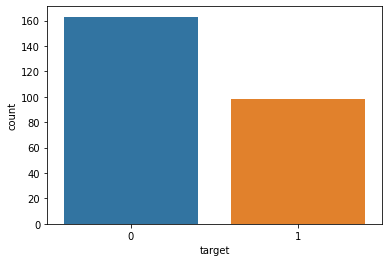

In [12]:
#Plotting the Target (Heart Disease)
plt.figure(figsize=(6,4))
sns.countplot(y)
plt.show()

In [13]:
#Analysing the shape of X_train and X_test Data

print(X_train.shape)
print(X_test.shape)

(208, 19)
(53, 19)


# MACHINE LEARNING MODELS

## 1. SVM

In [14]:
from sklearn.svm import SVC

#Function for storing model scores using various kernals
svc_scores = []
kernel_type = ['linear', 'poly', 'rbf', 'sigmoid']
for type in kernel_type:
    svc_classifier = SVC(kernel = type)
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

<BarContainer object of 4 artists>

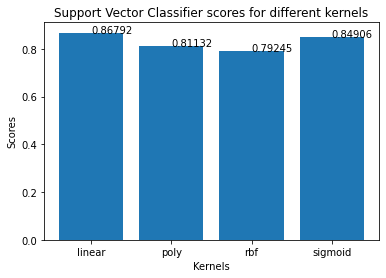

In [15]:
#Plotting the accuracy

for i in range(len(kernel_type)):
    label = round(svc_scores[i], 5)
    plt.text(i, svc_scores[i], label)
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.bar(kernel_type, svc_scores)

In [16]:
#Training the model on 'rbf' Kernal

svc =  SVC(kernel='linear')
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)

#Printing the confussion matrix and accuracy scores
print("confussion matrix")
print(svc_conf_matrix)
print(classification_report(y_test, svc_predicted))
print("\n")
print("Accuracy of Support Vector Classifier: {:.3f}".format(svc_acc_score*100),'%\n')

confussion matrix
[[31  2]
 [ 5 15]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.88      0.75      0.81        20

    accuracy                           0.87        53
   macro avg       0.87      0.84      0.85        53
weighted avg       0.87      0.87      0.87        53



Accuracy of Support Vector Classifier: 86.792 %



## 2. RANDOM FOREST 

In [20]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=500)
model.fit(X_train,y_train)
rfpred=model.predict(X_test)
RF_conf_matrix = confusion_matrix(y_test, rfpred)
rf_acc_score = accuracy_score(y_test, rfpred)

#Printing the confussion matrix and accuracy scores
print("\t Confussion Matrix")
print(RF_conf_matrix)
print(classification_report(y_test, rfpred))
print("\n")
print("Accuracy of Random Forest Classifier: {:.3f}".format(rf_acc_score*100),'%\n')

	 Confussion Matrix
[[29  4]
 [ 7 13]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.76      0.65      0.70        20

    accuracy                           0.79        53
   macro avg       0.79      0.76      0.77        53
weighted avg       0.79      0.79      0.79        53



Accuracy of Random Forest Classifier: 79.245 %



## 3. LOGISTIC REGRESSION 

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

#Printing the confussion matrix and accuracy scores
print("\t Confussion Matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,lr_predict))
print("Accuracy of Logistic Regression: {:.3f}".format(lr_acc_score*100),'%\n')

	 Confussion Matrix
[[30  3]
 [ 5 15]]


              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.83      0.75      0.79        20

    accuracy                           0.85        53
   macro avg       0.85      0.83      0.84        53
weighted avg       0.85      0.85      0.85        53

Accuracy of Logistic Regression: 84.906 %



In [19]:
from sklearn.model_selection import StratifiedKFold
def cv_model(classifier, splits=10):
    accuracy = []
    skf = StratifiedKFold(n_splits=splits)
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]
        classifier.fit(X_train, y_train)
        model_prediction = classifier.predict(X_test)
        conf_matrix = confusion_matrix(y_test, model_prediction)
        acc_score = accuracy_score(y_test, model_prediction)
        accuracy.append(acc_score)
    print('Accuracy:\n', accuracy)
    print('Average Accuracy:', np.mean(accuracy))

In [23]:
kernel_type = ['linear', 'poly', 'rbf', 'sigmoid']
for t in kernel_type:
    print("\tKernel: ", t)
    cv_model(SVC(kernel=t), 10)
    print('\n------------------\n')

	Kernel:  linear
Accuracy:
 [0.7777777777777778, 0.9230769230769231, 0.6923076923076923, 0.7692307692307693, 0.8076923076923077, 0.8461538461538461, 0.8461538461538461, 0.8076923076923077, 0.8846153846153846, 0.7692307692307693]
Average Accuracy: 0.8123931623931625

------------------

	Kernel:  poly
Accuracy:
 [0.7037037037037037, 0.8846153846153846, 0.6538461538461539, 0.7692307692307693, 0.8076923076923077, 0.8076923076923077, 0.8846153846153846, 0.8846153846153846, 0.9230769230769231, 0.7307692307692307]
Average Accuracy: 0.8049857549857549

------------------

	Kernel:  rbf
Accuracy:
 [0.7407407407407407, 0.8846153846153846, 0.6923076923076923, 0.7692307692307693, 0.7692307692307693, 0.8076923076923077, 0.8461538461538461, 0.8461538461538461, 0.8846153846153846, 0.7692307692307693]
Average Accuracy: 0.8009971509971511

------------------

	Kernel:  sigmoid
Accuracy:
 [0.7777777777777778, 0.8846153846153846, 0.7692307692307693, 0.8076923076923077, 0.8076923076923077, 0.846153846153

In [24]:
cv_model(LogisticRegression(), 10)

Accuracy:
 [0.7407407407407407, 0.9230769230769231, 0.6923076923076923, 0.7692307692307693, 0.8076923076923077, 0.8461538461538461, 0.8846153846153846, 0.8076923076923077, 0.8461538461538461, 0.7307692307692307]
Average Accuracy: 0.8048433048433047


In [25]:
cv_model(RandomForestClassifier(n_estimators=800), 10)

Accuracy:
 [0.7407407407407407, 0.8461538461538461, 0.6538461538461539, 0.6923076923076923, 0.7692307692307693, 0.8076923076923077, 0.7692307692307693, 0.7307692307692307, 0.7692307692307693, 0.6923076923076923]
Average Accuracy: 0.7471509971509972


In [26]:
def cv_model_get_best_fit(classifier, splits=10):
    accuracy = []
    batch = []
    skf = StratifiedKFold(n_splits=splits)
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]
        batch.append([X_train, X_test, y_train, y_test])
        classifier.fit(X_train, y_train)
        model_prediction = classifier.predict(X_test)
        conf_matrix = confusion_matrix(y_test, model_prediction)
        acc_score = accuracy_score(y_test, model_prediction)
        accuracy.append(acc_score)
    print('Accuracy:\n', accuracy)
    print('Average Accuracy:', np.mean(accuracy))
    print('Max Accuracy:{} at {} '.format(np.max(accuracy), np.argmax(accuracy)))
    return batch[np.argmax(accuracy)]

In [27]:
final_model = SVC(kernel='linear')
X_train, X_test, y_train, y_test = cv_model_get_best_fit(final_model)

final_model.fit(X_train, y_train)

Accuracy:
 [0.7777777777777778, 0.9230769230769231, 0.6923076923076923, 0.7692307692307693, 0.8076923076923077, 0.8461538461538461, 0.8461538461538461, 0.8076923076923077, 0.8846153846153846, 0.7692307692307693]
Average Accuracy: 0.8123931623931625
Max Accuracy:0.9230769230769231 at 1 


SVC(kernel='linear')

In [28]:
[X_test.iloc[20], '===================',y_test.iloc[20]]

[age         -0.227810
 trestbps    -0.715960
 chol         0.423105
 thalach     -0.597910
 oldpeak      0.426588
 sex_0        0.000000
 sex_1        1.000000
 cp_1         0.000000
 cp_2         0.000000
 cp_3         0.000000
 cp_4         1.000000
 fbs_0        1.000000
 fbs_1        0.000000
 restecg_0    1.000000
 restecg_1    0.000000
 restecg_2    0.000000
 restecg_?    0.000000
 exang_0      0.000000
 exang_1      1.000000
 Name: 203, dtype: float64,
 '===================',
 1]